In [56]:
import matplotlib.pyplot as plt
from vnstock import Quote
import pandas as pd


from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *

import warnings
warnings.filterwarnings("ignore")

In [64]:
end_date = '2025-10-25'

start_date_object = pd.to_datetime(end_date) - pd.DateOffset(years=15)
start_date_string = start_date_object.strftime('%Y-%m-%d')

quote = Quote(symbol='VNINDEX', source='VCI')
df = quote.history(start=start_date_string, end=end_date,index=True)

df.set_index('time', inplace=True)
df.index = pd.to_datetime(df.index)

df



,open,high,low,close,volume
time,,,,,
2010-10-25,444.70,448.60,443.10,448.60,23427100
2010-10-26,450.20,458.20,450.20,455.10,30139330
2010-10-27,455.20,455.90,448.90,450.00,23349570
2010-10-28,448.60,451.50,448.30,450.10,20155160
2010-10-29,450.50,452.80,450.30,452.60,22494310
...,...,...,...,...,...
2025-10-06,1673.16,1695.50,1664.17,1695.50,1087044888
2025-10-07,1703.90,1703.90,1678.66,1685.30,879953011
2025-10-08,1701.06,1704.42,1680.87,1697.83,1067425184


In [65]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3735 entries, 2010-10-25 to 2025-10-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3735 non-null   float64
 1   high    3735 non-null   float64
 2   low     3735 non-null   float64
 3   close   3735 non-null   float64
 4   volume  3735 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 175.1 KB
None
              open         high          low        close        volume
count  3735.000000  3735.000000  3735.000000  3735.000000  3.735000e+03
mean    859.858137   865.259162   853.695106   859.747660  3.085798e+08
std     336.908505   338.819831   334.046796   336.744681  3.235361e+08
min     334.930000   339.320000   332.280000   336.730000  0.000000e+00
25%     560.625000   564.715000   557.415000   560.985000  8.878622e+07
50%     872.690000   876.970000   868.210000   873.470000  1.536348e+08
75%    1148.925000  1156.715000  1138.090000  1149.31500

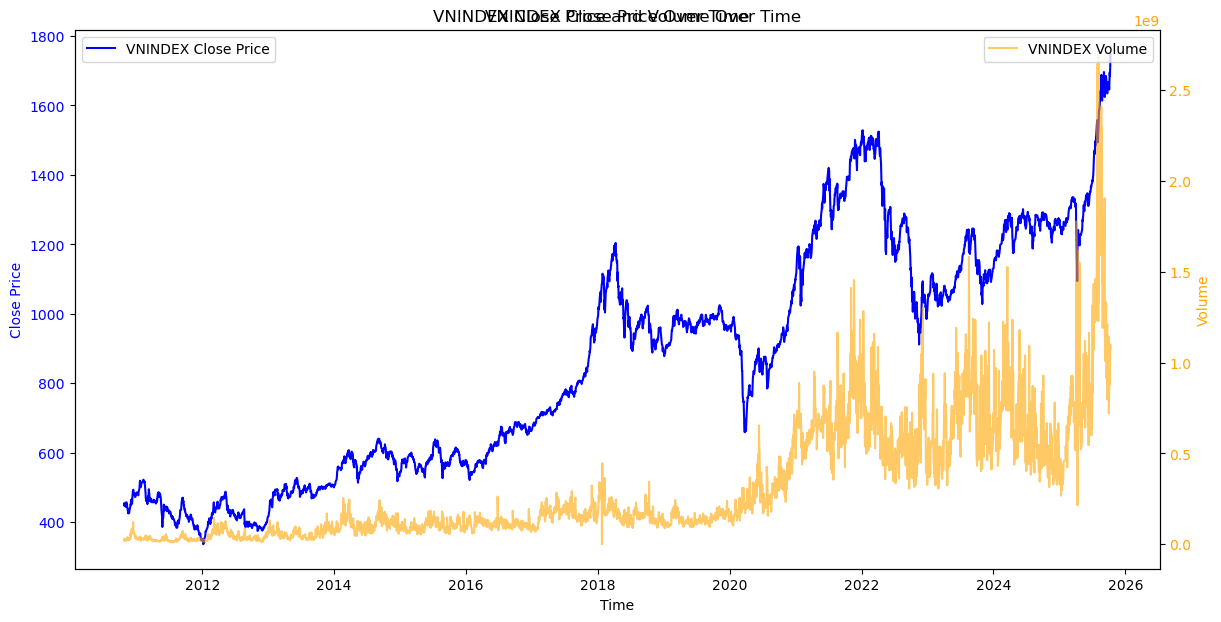

In [ ]:
fig1, ax1 = plt.subplots(figsize=(14,7))
ax1.plot(df.index, df['close'], label='VNINDEX Close Price', color='blue')
ax1.set_title('VNINDEX Close Price Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(df.index, df['volume'], label='VNINDEX Volume', color='orange', alpha=0.6)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')
plt.title('VNINDEX Close Price and Volume Over Time')
plt.show()

## Time series Analysis

In [67]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, WindowAverage, SeasonalNaive

In [68]:
horizon = 7

models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=7),
    SeasonalNaive(season_length=7)
]

sf = StatsForecast(models=models, freq="D")
sf.fit(df=df)
preds = sf.predict(h=horizon)

KeyError: 'ds'

In [ ]:
preds.head()

In [71]:
plot_series(
    df=df, 
    forecasts_df=preds, 
    ids=["close"], 
    max_insample_length=28, 
    palette="viridis")

NameError: name 'preds' is not defined